In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import linear_model, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df=pd.read_csv(url)

df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
# As Country Region and happiness Rank doesn't effect the data we are gonna drop them  

In [4]:
num_data=df.drop(["Country","Region","Happiness Rank"], axis=1)
num_data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
# Visializing the above data

In [6]:
num_data.shape

(158, 9)

In [7]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [8]:
num_data.isna().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
num_data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [11]:
num_data.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


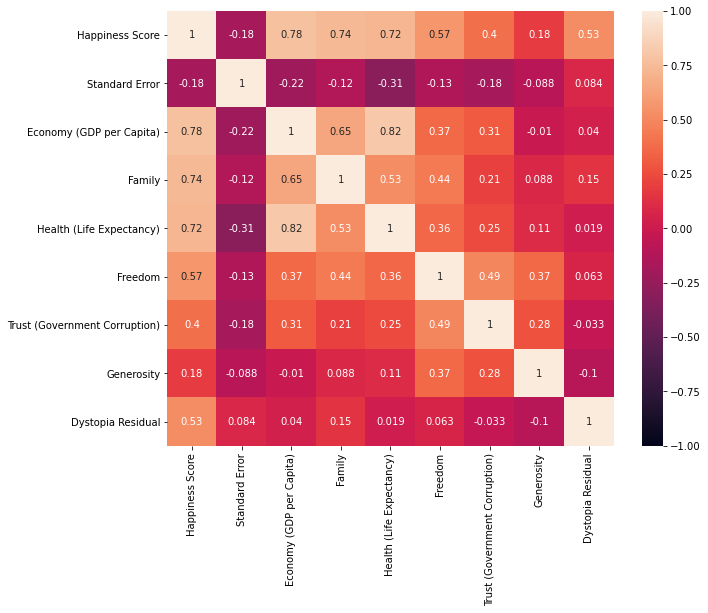

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(num_data.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [13]:
features_data=num_data.drop("Happiness Score", axis=1)
features_data

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [14]:
target_data=num_data["Happiness Score"]
target_data

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
5      7.406
6      7.378
7      7.364
8      7.286
9      7.284
10     7.278
11     7.226
12     7.200
13     7.187
14     7.119
15     6.983
16     6.946
17     6.940
18     6.937
19     6.901
20     6.867
21     6.853
22     6.810
23     6.798
24     6.786
25     6.750
26     6.670
27     6.611
28     6.575
29     6.574
30     6.505
31     6.485
32     6.477
33     6.455
34     6.411
35     6.329
36     6.302
37     6.298
38     6.295
39     6.269
40     6.168
41     6.130
42     6.123
43     6.003
44     5.995
45     5.987
46     5.984
47     5.975
48     5.960
49     5.948
50     5.890
51     5.889
52     5.878
53     5.855
54     5.848
55     5.833
56     5.828
57     5.824
58     5.813
59     5.791
60     5.770
61     5.759
62     5.754
63     5.716
64     5.709
65     5.695
66     5.689
67     5.605
68     5.589
69     5.548
70     5.477
71     5.474
72     5.429
73     5.399
74     5.360
75     5.332
76     5.286

In [15]:
reg= linear_model.LinearRegression()
lm= LinearRegression()

In [16]:
lm.fit(features_data, target_data)

LinearRegression()

In [17]:
print("Estimated Intercept", lm.intercept_)

Estimated Intercept 7.401141772778175e-05


In [18]:
print(lm.coef_)

[-1.75982878e-04  1.00010232e+00  9.99970526e-01  9.99877780e-01
  9.99695750e-01  9.99915961e-01  1.00006100e+00  1.00003081e+00]


In [19]:
obtained_data=pd.DataFrame(list(zip(features_data.columns, lm.coef_)),columns=["Features","Co-efficients"])

In [20]:
obtained_data

,Features,Co-efficients
0,Standard Error,-0.000176
1,Economy (GDP per Capita),1.000102
2,Family,0.999971
3,Health (Life Expectancy),0.999878
4,Freedom,0.999696
5,Trust (Government Corruption),0.999916
6,Generosity,1.000061
7,Dystopia Residual,1.000031


In [21]:
predicted_100=lm.predict(features_data)[0:100]
predicted_100=pd.DataFrame(predicted_100)
predicted_100.columns=['Predicted Happiness Score']
predicted_100

,Predicted Happiness Score
0,7.586874
1,7.560868
2,7.526996
3,7.522152
4,7.426877
5,7.406008
6,7.378099
7,7.363613
8,7.285994
9,7.283979


In [22]:
first_100_target_data=target_data[0:100]
first_100_target_data=pd.DataFrame(first_100_target_data)
first_100_target_data

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
5,7.406
6,7.378
7,7.364
8,7.286
9,7.284


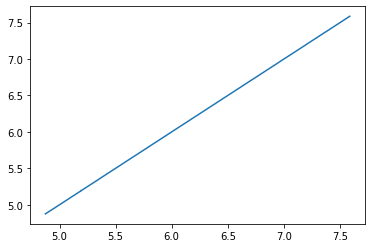

In [23]:
plt.plot(predicted_100,first_100_target_data)

The Above graph suggest that there is very small residual 

** Another Method **

In [24]:
scaler =MinMaxScaler()
features_data =pd.DataFrame(scaler.fit_transform(features_data),columns=features_data.columns)

In [25]:
features_data


,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
5,0.109076,0.763272,0.940117,0.867213,0.958132,0.749615,0.293399,0.699841
6,0.080287,0.786455,0.912953,0.870851,0.919415,0.576435,0.598206,0.652843
7,0.110511,0.787798,0.919300,0.888437,0.985173,0.794405,0.455621,0.623972
8,0.128577,0.739568,0.941122,0.885999,0.954683,0.777699,0.596836,0.591304
9,0.188687,0.788905,0.933677,0.908617,0.972392,0.645703,0.547344,0.591979


Testing

In [26]:
X_train, X_test, y_train, y_test= train_test_split(features_data, target_data, train_size=0.7)

In [27]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
print(f"Regression R2: {model.score(X_test, y_test)}")

Regression R2: 0.9999999030682557
